In [1]:
import random
import helpers
import numpy as np
import pandas as pd
from copy import copy
from genetic import Experiment,Population,Chromosome,Gen
from joblib import Parallel, delayed,parallel_backend
import time
from ExperimentBase import ExperimentBaseModel
import matplotlib.pyplot as plt
import math
import gdal

In [2]:
class Experiment1(ExperimentBaseModel):
    def __init__(self,s1,s2,name,path,target,verbose):
        ExperimentBaseModel.__init__(self,s1,s2,name,path,target,verbose)
        self.mem = {}
    
    def setup(self):
        self.radious = 1
        self.neighborhood = helpers.moore([self.radious,self.radious])
        self.mutationRate = .5
        self.noChromosomes = 5
        self.noIterations = 200
        super().setup()

In [3]:
def readraster(file):
    dataSource = gdal.Open(file)
    band = dataSource.GetRasterBand(1)
    band = band.ReadAsArray()
    return(dataSource, band)

In [4]:
stateFiles1 = ["cbddist.tif","roaddist.tif","dda_2021_government_restricted.tif","den1991.tif","slope.tif","Actual_1994.tif"]
stateFiles2 = ["cbddist.tif","roaddist.tif","dda_2021_government_restricted.tif","den2001.tif","slope.tif","Actual_1999.tif"]
stateFiles = [stateFiles1,stateFiles2]
states = []
path = "data"
for i,files in enumerate(stateFiles):
    state = []
    for file in files:
        source,band = readraster(f"{path}/{file}")
        state.append(np.array(band))
    states.append(np.array(state))

newStates = []
for state in states:
    temp = np.array(state)
    temp = temp.transpose().reshape(-1,np.shape(temp)[0])
    newStates.append(temp)

In [5]:
exp2 = Experiment1(states[0],states[1],"ExperimentGA2","ExperimentGA2",5,verbose=2)
exp2.run()

start setup
4.195000171661377
end setup
config saved at ExperimentGA2/26_01_20_21_34_08/config.json
iteration 1
goal = 0goal = 1

goal = 2goal = 3

goal 3 elapsed time: 3.3299994468688965
goal = 4
goal 2 elapsed time: 52.57400989532471
goal 1 elapsed time: 70.39500975608826
goal 4 elapsed time: 168.8947308063507
goal 0 elapsed time: 294.16773295402527
{'generation': 1, 'elapsedTime': 294.22073125839233, 'fitness': {0: [865678.6666690959, 834743.7000036394, 927530.0000000007], 1: [46095.566666663275, 47780.6999999869, 54522.999999982094], 2: [33752.366666706235, 33505.70000003802, 36216.20000002915], 3: [2087.233333333447, 2029.8000000001975, 2621.200000000058], 4: [175539.29999989062, 168547.59999982477, 197682.60000015952]}}
0 (1935, 1822) 0 0 0
0 (1935, 1822) 1 0 0
0 (1935, 1822) 2 0 0
0 (1935, 1822) 3 0 0
0 (1935, 1822) 4 0 0
0 (1935, 1822) 5 0 0
0 (1935, 1822) 0 0 1
0 (1935, 1822) 1 0 1
0 (1935, 1822) 2 0 1
0 (1935, 1822) 3 0 1
0 (1935, 1822) 4 0 1
0 (1935, 1822) 5 0 1
0 (1935, 182

IndexError: index 1822 is out of bounds for axis 1 with size 1822

# exp2.world.populations[3].toDict()

In [21]:
source,band = readraster(f"{path}/{stateFiles1[1]}")

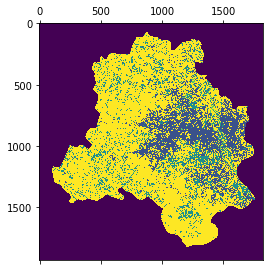

In [22]:
plt.matshow(band)

In [28]:
import helpers
helpers.moore([1,1])

[array([-1, -1]),
 array([-1,  0]),
 array([-1,  1]),
 array([ 0, -1]),
 array([0, 0]),
 array([0, 1]),
 array([ 1, -1]),
 array([1, 0]),
 array([1, 1])]

In [31]:
np.sum([[1,1],[2,2]],axis=0)

array([3, 3])

In [47]:
np.array([[[1,1],[3,3]],[[1,1],[2,2]]])[:][1,1]

array([2, 2])

In [35]:
[1]+list((3,2))

[1, 3, 2]

In [7]:
for layer in states[1]:
    print(np.shape(layer))

(1935, 1822)
(1935, 1822)
(1935, 1822)
(1935, 1822)
(1935, 1822)
(1935, 1822)
